In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('pastel')

In [2]:
import re
import langid
from langdetect import detect
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
import mglearn
from collections import Counter

In [3]:
desc=pd.read_csv('listings_summary.csv')

In [4]:
desc.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


In [5]:
desc.shape

(22552, 96)

In [6]:
desc.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,2.255200e+04,2.255200e+04,0.0,0.0,0.0,2.255200e+04,0.0,22526.000000,22526.000000,22552.000000,...,18163.000000,18138.000000,18141.000000,18120.000000,18134.000000,18121.000000,18117.000000,0.0,22552.000000,18638.000000
mean,1.571560e+07,2.018111e+13,NaN,NaN,NaN,5.403355e+07,NaN,2.330685,2.330685,52.509824,...,94.413863,9.663965,9.324955,9.713521,9.730672,9.505491,9.411106,NaN,1.918233,1.135525
std,8.552069e+06,4.812607e+00,NaN,NaN,NaN,5.816290e+07,NaN,19.947823,19.947823,0.030825,...,7.639644,0.740039,1.031996,0.704620,0.686614,0.762161,0.841492,NaN,3.667257,1.507082
min,2.015000e+03,2.018111e+13,NaN,NaN,NaN,2.217000e+03,NaN,0.000000,0.000000,52.345803,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.010000
25%,8.065954e+06,2.018111e+13,NaN,NaN,NaN,9.240002e+06,NaN,1.000000,1.000000,52.489065,...,92.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.180000
50%,1.686638e+07,2.018111e+13,NaN,NaN,NaN,3.126711e+07,NaN,1.000000,1.000000,52.509079,...,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,0.540000
75%,2.258393e+07,2.018111e+13,NaN,NaN,NaN,8.067518e+07,NaN,2.000000,2.000000,52.532669,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.500000
max,2.986735e+07,2.018111e+13,NaN,NaN,NaN,2.245081e+08,NaN,1676.000000,1676.000000,52.651670,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,45.000000,36.670000


In [7]:
desc.drop(desc.columns[desc.isnull().sum()>2255],axis=1,inplace=True) #drop columns with missing value >=10% of rows

In [8]:
desc.drop(desc.columns[desc.nunique()==1],axis=1,inplace=True) # drop columns with unique value

In [9]:
desc.drop([i for i in desc.columns if i.endswith('_url')==True or i.endswith('scraped')==True],axis=1,inplace=True) # drop columns with urls

In [10]:
desc.shape

(22552, 51)

In [11]:
desc[desc.columns[desc.dtypes==object]].iloc[:,20:30]

,property_type,room_type,bed_type,amenities,price,extra_people,calendar_updated,requires_license,instant_bookable,cancellation_policy
0,Guesthouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",$60.00,$28.00,3 months ago,t,f,strict_14_with_grace_period
1,Apartment,Private room,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",$17.00,$0.00,7 weeks ago,t,f,flexible
2,Apartment,Entire home/apt,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",$90.00,$20.00,a week ago,t,t,strict_14_with_grace_period
3,Apartment,Private room,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",$26.00,$18.00,4 weeks ago,t,f,strict_14_with_grace_period
4,Apartment,Private room,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",$42.00,$24.00,3 days ago,t,f,moderate
5,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",$180.00,$10.00,2 weeks ago,t,f,strict_14_with_grace_period
6,Apartment,Entire home/apt,Real Bed,"{TV,Internet,Wifi,Kitchen,""Buzzer/wireless int...",$70.00,$0.00,today,t,f,strict_14_with_grace_period
7,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Smoking ...",$120.00,$13.00,never,t,f,strict_14_with_grace_period
8,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,Kitchen,""Buzzer/wireless intercom"",He...",$90.00,$20.00,2 months ago,t,f,strict_14_with_grace_period
9,Condominium,Private room,Real Bed,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",$45.00,$26.00,a week ago,t,f,strict_14_with_grace_period


In [12]:
desc['cancellation_policy'].value_counts()

flexible                       9102
moderate                       7096
strict_14_with_grace_period    6287
super_strict_30                  53
super_strict_60                  14
Name: cancellation_policy, dtype: int64

In [13]:
desc[desc.columns[desc.dtypes==object]].nunique()

name                                21873
summary                             21041
description                         21997
host_name                            5997
host_since                           2914
host_location                        1036
host_is_superhost                       2
host_verifications                    301
host_has_profile_pic                    2
host_identity_verified                  2
street                                 86
neighbourhood                          91
neighbourhood_cleansed                136
neighbourhood_group_cleansed           12
city                                   60
state                                  19
zipcode                               215
market                                  6
smart_location                         61
is_location_exact                       2
property_type                          33
room_type                               3
bed_type                                5
amenities                         

In [14]:
desc.drop(['name','summary','host_name','street','neighbourhood','neighbourhood_cleansed','city','state','market','smart_location'],axis=1,inplace=True)

In [15]:
desc[desc.columns[desc.dtypes!=object]].head()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,calculated_host_listings_count
0,2015,2217,4.0,4.0,52.534537,13.402557,3,1.0,1.0,2.0,1,4,1125,0,21,51,141,118,4
1,2695,2986,1.0,1.0,52.548513,13.404553,2,1.0,1.0,1.0,1,2,40,0,0,0,0,6,1
2,3176,3718,1.0,1.0,52.534996,13.417579,4,1.0,1.0,2.0,2,62,1125,0,0,0,220,143,1
3,3309,4108,1.0,1.0,52.498855,13.349065,2,1.0,1.0,1.0,1,5,360,0,0,22,297,25,1
4,7071,17391,1.0,1.0,52.543157,13.415091,2,1.0,1.0,2.0,1,2,10,15,26,26,26,197,1


In [16]:
desc.drop(['host_listings_count','host_total_listings_count'],axis=1,inplace=True) 

In [17]:
desc.shape

(22552, 39)

In [18]:
desc['description'].describe()

count                                                 22349
unique                                                21997
top       with en-suite bathroom, TV, WIFI, bed linen, a...
freq                                                     12
Name: description, dtype: object

In [19]:
desc['amenities'].describe()

count     22552
unique    19985
top          {}
freq         75
Name: amenities, dtype: object

In [20]:
desc['description']=desc['description'].fillna('')

In [21]:
languages=[]
errors=[]
for i in desc['description'][desc['description']!='']:
    try:
        language=detect(i)
        languages.append(language)
    except:
        language='error'
        print('error:',i)
        errors.append(i)

error: .....
error: ...
error: .
error: !
error: ...
error: ...
error: .
error: .
error: .
error: .
error: .
error: .
error: 7


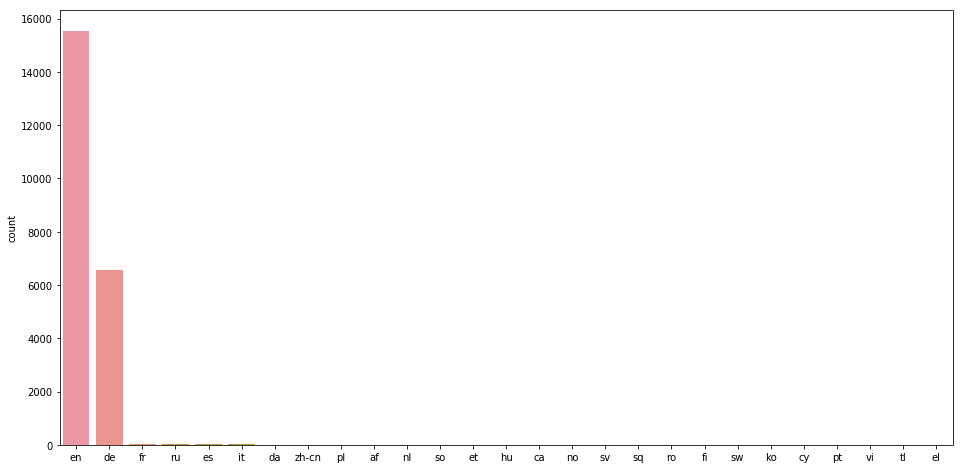

In [22]:
fig=plt.figure(figsize=(16,8))
sns.countplot(languages)

In [23]:
countvec=CountVectorizer()
count_description=countvec.fit_transform(desc['description'])
knn1=KMeans(n_clusters=4,init='k-means++', max_iter=100, n_init=10)
knn1.fit(count_description)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
order_centroids = knn1.cluster_centers_.argsort()[:, ::-1]
terms = countvec.get_feature_names()
for i in range(4):
    print('Cluster %d:' % i),
    print([terms[ind] for ind in order_centroids[i, :10]])

Cluster 0:
['und', 'die', 'in', 'der', 'mit', 'ist', 'wohnung', 'ein', 'im', 'das']
Cluster 1:
['in', 'the', 'and', 'to', 'und', 'is', 'with', 'of', 'room', 'berlin']
Cluster 2:
['the', 'and', 'is', 'in', 'to', 'you', 'of', 'with', 'room', 'apartment']
Cluster 3:
['the', 'and', 'in', 'to', 'is', 'with', 'you', 'of', 'room', 'for']


In [26]:
tfidfvec=TfidfVectorizer()
descriptions=tfidfvec.fit_transform(desc['description'])
knn2=KMeans(n_clusters=4,init='k-means++', max_iter=100, n_init=10)
knn2.fit(descriptions)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
order_centroids = knn2.cluster_centers_.argsort()[:, ::-1]
terms = tfidfvec.get_feature_names()
for i in range(4):
    print('Cluster %d:' % i),
    print([terms[ind] for ind in order_centroids[i, :10]])


Cluster 0:
['the', 'and', 'is', 'of', 'with', 'in', 'to', 'apartment', 'room', 'you']
Cluster 1:
['and', 'the', 'to', 'in', 'with', 'room', 'of', 'is', 'apartment', 'for']
Cluster 2:
['und', 'die', 'der', 'ist', 'mit', 'wohnung', 'ein', 'im', 'in', 'zimmer']
Cluster 3:
['the', 'and', 'you', 'to', 'is', 'in', 'of', 'with', 'room', 'will']


In [28]:
knn2.labels_

array([0, 0, 0, ..., 3, 3, 1], dtype=int32)

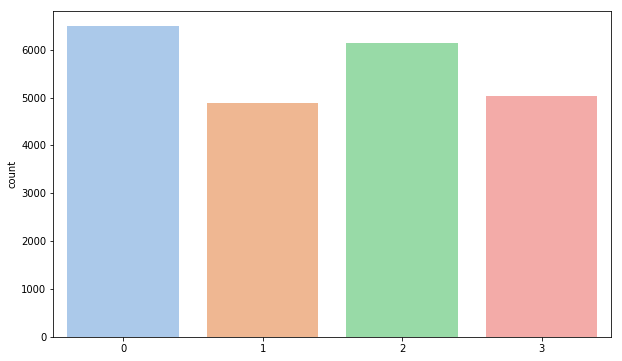

In [29]:
fig=plt.figure(figsize=(10,6))
sns.countplot(knn2.labels_)

In [30]:
desc['description_type']=knn2.labels_

In [31]:
#Amenities

In [32]:
alanguages=[]
aerrors=[]
for i in desc['amenities']:
    try:
        alanguage=detect(i)
        alanguages.append(alanguage)
    except:
        alanguage='error'
        aerrors.append(i)

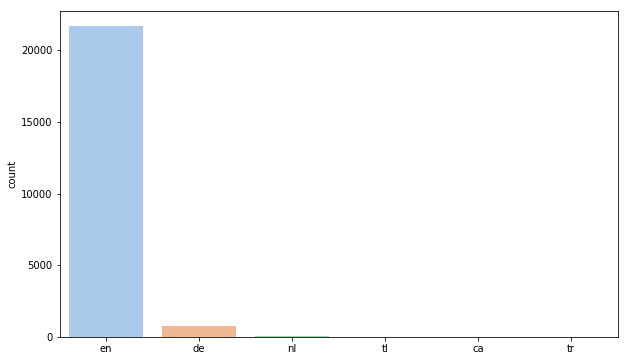

In [33]:
fig=plt.figure(figsize=(10,6))
sns.countplot(alanguages)

In [34]:
print(desc['amenities'][10])
print(desc['amenities'][100])
print(desc['amenities'][1000])
print(desc['amenities'][10000])

{TV,Wifi,Kitchen,"Free street parking","Buzzer/wireless intercom",Heating,Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Hot water","Luggage dropoff allowed","Long term stays allowed",Other}
{Wifi,Kitchen,"Paid parking off premises","Smoking allowed",Heating,Washer,"Smoke detector",Essentials,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Private living room","Hot water","Bed linens",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Luggage dropoff allowed"}
{TV,Internet,Wifi,"Air conditioning","Wheelchair accessible",Kitchen,Elevator,"Buzzer/wireless intercom",Heating,Washer,Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Hot water","Host greets you"}
{TV,"Cable TV",Wifi,Kitchen,"Free street parking",Heating,"Family/kid friendly",Washer,Dryer,Essentials,"Lock on bedroom door",Hangers,"Hair dryer",Bathtub,"High chair","Ch

In [35]:
desc['list_amenities']=desc['amenities'].str.strip('{}')\
                                   .str.replace('"', '').str.lstrip('\"').str.rstrip('\"').str.split(',')

In [44]:
print(desc['list_amenities'][10])
desc['amenities_count']=desc['list_amenities'].apply(lambda x: len(x))

['TV', 'Wifi', 'Kitchen', 'Free street parking', 'Buzzer/wireless intercom', 'Heating', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Hot water', 'Luggage dropoff allowed', 'Long term stays allowed', 'Other']


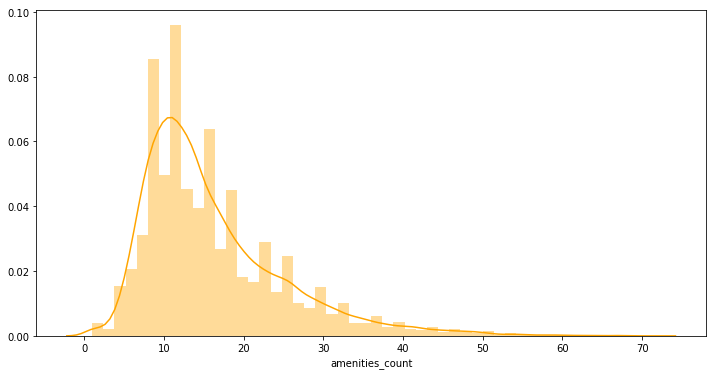

In [65]:
figure=plt.figure(figsize=(12,6))
sns.distplot(desc['amenities_count'].sort_values(),color='orange')

In [37]:
results = Counter()
desc['list_amenities'].apply(results.update)
results.most_common(30)

[('Wifi', 21512),
 ('Kitchen', 21332),
 ('Heating', 21190),
 ('Essentials', 20329),
 ('Washer', 18497),
 ('Hair dryer', 14891),
 ('Laptop friendly workspace', 14447),
 ('Hangers', 13908),
 ('Iron', 11206),
 ('Shampoo', 10654),
 ('TV', 10134),
 ('Hot water', 9744),
 ('Family/kid friendly', 8141),
 ('Internet', 7909),
 ('Host greets you', 6663),
 ('Smoke detector', 6457),
 ('Buzzer/wireless intercom', 6116),
 ('Lock on bedroom door', 5294),
 ('Refrigerator', 5212),
 ('Free street parking', 5190),
 ('Dishes and silverware', 5082),
 ('Elevator', 4867),
 ('Bed linens', 4842),
 ('Cooking basics', 4834),
 ('Stove', 4816),
 ('Smoking allowed', 4589),
 ('Oven', 4312),
 ('translation missing: en.hosting_amenity_50', 4184),
 ('First aid kit', 4011),
 ('Cable TV', 3725)]

In [38]:
amenities_count=pd.DataFrame.from_dict(results,orient='index',columns=['count'])

In [39]:
amenities_count['count'].sort_values(ascending=False)[:20]

Wifi                         21512
Kitchen                      21332
Heating                      21190
Essentials                   20329
Washer                       18497
Hair dryer                   14891
Laptop friendly workspace    14447
Hangers                      13908
Iron                         11206
Shampoo                      10654
TV                           10134
Hot water                     9744
Family/kid friendly           8141
Internet                      7909
Host greets you               6663
Smoke detector                6457
Buzzer/wireless intercom      6116
Lock on bedroom door          5294
Refrigerator                  5212
Free street parking           5190
Name: count, dtype: int64

Text(0.5,0,'Count')

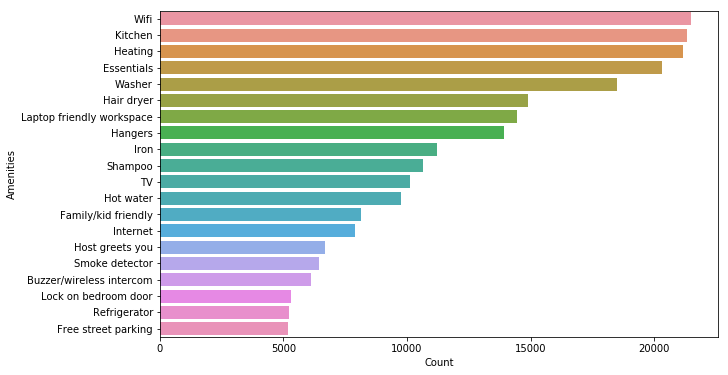

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(y=amenities_count['count'].sort_values(ascending=False)[:20].index,\
            x=amenities_count['count'].sort_values(ascending=False)[:20].values,orient='h')
plt.ylabel('Amenities')
plt.xlabel('Count')

In [41]:
desc['washer']=desc['amenities'].str.contains('Washer')
desc['Laptop friendly workspace']=desc['amenities'].str.contains('Laptop friendly workspace')
desc['TV']=desc['amenities'].str.contains('TV')
desc['Refrigerator']=desc['amenities'].str.contains('Refrigerator')

In [66]:
desc.to_csv('cleaned_listing.csv')